<b> Preparation </b>

In [2]:
!pip install pydicom
!pip install trimesh
!python -m pip install pymeshlab

import os # for file-handling
import numpy as np # maths
import matplotlib.pyplot as plt # plotting
from pydicom import dcmread # reading DICOM files

You should consider upgrading via the 'C:\Users\nasta\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\nasta\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\nasta\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd
# load one slice
slice_img = dcmread("DICOM_Brain/brain_018.dcm")
img = np.array(slice_img.pixel_array)

# threshold segmentation 
threshold = 450
seg = (img > threshold)
label_im = label(seg)
#print(label_im)
regions = regionprops(label_im)
regions_tables=regionprops_table(label_im)
#############################################
# Perform a connected component analysis on
# the segmentation of the slice image here
# to remove all segmentation results that do
# not belong to the white matter.
#############################################
properties = ['area','convex_area','bbox_area']
df=pd.DataFrame(regionprops_table(label_im, img, 
             properties=properties))
#region number 1 has the maximum area, convex_area and bbox_area
n=df['area'].idxmax()
print(df)
print(n)
print(len(regions[1].coords))

    area  convex_area  bbox_area
0    531         5246       8052
1   8375        11804      15070
2     11           18         32
3      1            1          1
4      2            2          2
5     12           20         28
6      1            1          1
7      1            1          1
8      4            4          4
9      5            6          8
10    72           92        175
11     1            1          1
12     1            1          1
13     1            1          1
14     2            2          4
15     2            2          4
16     4            5          6
17  1664        14726      17612
18     1            1          1
19     1            1          1
20     2            2          2
21     2            2          4
22     1            1          1
23     2            2          2
24     1            1          1
25     1            1          1
26     1            1          1
27     2            2          4
28     1            1          1
29     1  

<b> Visualize the Results </b>

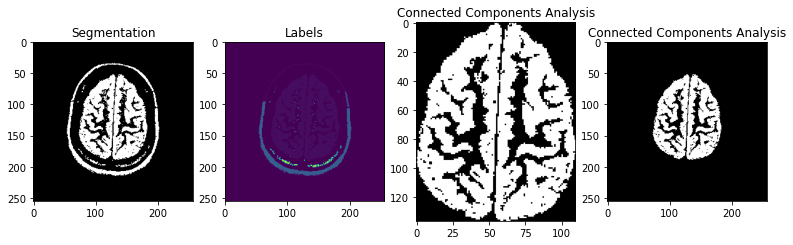

In [5]:
# Create a figure (window)
fig = plt.figure(figsize=(20,10))

# display using gray levels
ax1 = fig.add_subplot(1, 6, 3)
ax1.set_title('Segmentation')
ax1.imshow(seg, cmap='gray')

####################################################################
# Use the following code to display your result:
# Replace "YOUR_SEGMENTATION_RESULT" with the correct variable name
####################################################################
ax2 = fig.add_subplot(1, 6, 4)
ax2.set_title('Labels')
ax2.imshow(label_im)
#seg[regions[1].coords]=0
ax3 = fig.add_subplot(1, 6, 5)
ax3.set_title('Connected Components Analysis')
ax3.imshow(regions[1].image, cmap='gray')

new_seg=np.zeros(shape=(256,256))
for r in range(len(regions[1].coords)):
    row_value=regions[1].coords[r][0]
    column_value=regions[1].coords[r][1]
    new_seg[row_value,column_value]=seg[row_value,column_value]
  
ax4 = fig.add_subplot(1, 6, 6)
ax4.set_title('Connected Components Analysis')
ax4.imshow(new_seg, cmap='gray')